# ML. Практика 2.1. Логистическая регрессия

В этой лабораторной работе вам предстоит обучить **модель логистической регрессии**.

Представьте, что вы сотрудник приемной комиссии и хотите оценить шансы студента на прохождение на бюджет.  
У вас есть исторические данные о сдачах студентами двух входных экзаменов по 100-балльной шкале.  
Кроме того, данные размечены. То есть студенты, прошедшие отбор помечены меткой 1, остальные 0.

Ваша задача - заполнить код в функциях:  
- logistic - вычисляет логистическую функцию от аргумента,
- compute_cost - вычисляет функцию стоимости,
- compute_cost_grad - вычисляет градиент функции стоимости.

В данной задаче будет использоваться *градиентный метод оптимизации*, определенный в библиотеке *scipy*, так что
не нужно реализовывать градиентный спуск.

**Комментарии к графикам:**  
Первый график - исходные данные.  
Второй - исходные данные с результатом работы модели - границей решений.  
Черным цветом обозначено поле, попадание точки в которое означает ее
принадлежность к 1 классу (студент проходит на бюджет), белым - принадлежность к 0 классу (не проходит на бюджет).

In [2]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [3]:
def logistic(z):

    # Функция принимает аргумент z - скаляр, вектор или матрицу в виде объекта numpy.array()
    # Должна возвращать скяляр, вектор или матрицу (в зависимости от размерности z)
    # результатов вычисления логистической функции от элементов z

    result = np.zeros(z.shape)  # результат, его нужно посчитать
    
    result = 1 / (1 + np.exp(-z))

    return result

In [31]:
def compute_cost(X, y, theta):

    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Должна возвратить число - результат вычисления функции стоимости в точке theta.

    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    cost = 0  # значение функции стоимости при заданных параметрах, его нужно посчитать
    y = y[:, np.newaxis]

    cost = 1/m * np.sum(-y @ np.log(logistic(theta @ X.T)) - (1 - y) @ np.log(1 - logistic(theta @ X.T)))

    return cost

In [5]:
def compute_cost_grad(X, y, theta):
    # Функция принимает матрицу данный X, вектор целевых переменных y и вектор параметров theta.
    # Должна возвратить вектор координат градиента функции стоимости в точке theta.
    # Вектор можно заполнять в виде списка python. При возврате он преобразуется в массив numpy.

    m, n = X.shape  # m - количество примеров в выборке, n - количество признаков у каждого примера
    grad = [0] * n  # вектор градиента функции стоимости по theta, его нужно заполнить

    # ВАШ КОД ЗДЕСЬ

    pass

    # =============

    return np.array(grad)

In [6]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [7]:
X, y = load_data('lab2data1.txt')

In [8]:
print(f'logistic(0) = {np.round(logistic(np.array(0)), 5)} (должно быть 0.5)\n'
      f'logistic(-10) = {np.round(logistic(np.array(-10)), 5)} (должно быть ~0)\n'
      f'logistic(10) = {np.round(logistic(np.array(10)), 5)} (должно быть ~1)')

logistic(0) = 0.5 (должно быть 0.5)
logistic(-10) = 5e-05 (должно быть ~0)
logistic(10) = 0.99995 (должно быть ~1)


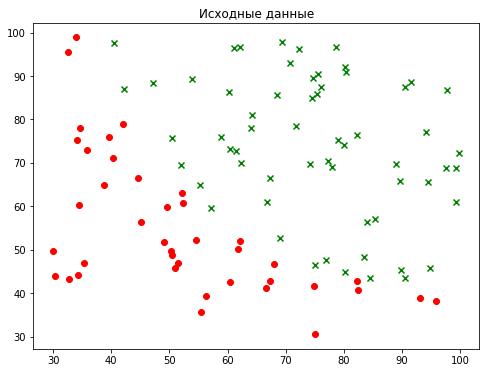

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Исходные данные')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x');

In [33]:
init_theta = np.zeros((1, X.shape[1]))
cost0 = compute_cost(X, y, init_theta)
print(f'Функция стоимости при начальном theta = {np.round(cost0, 3)} (должно быть ~0.693)')

Функция стоимости при начальном theta = 69.315 (должно быть ~0.693)


In [34]:
opt_theta_obj = minimize(lambda th: compute_cost(X, y, th), init_theta,
                         method='CG',
                         jac=lambda th: compute_cost_grad(X, y, th),
                         options={'gtol': 1e-5, 'maxiter': 200, 'disp': False})

print('Минимизация функции стоимости ' + ('прошла успешно.' if opt_theta_obj.success else 'не удалась.'))
opt_theta = opt_theta_obj.x

opt_cost = compute_cost(X, y, opt_theta)
print(f'Функция стоимости при оптимальном theta = {opt_cost} (должно быть ~0.203)')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 1)

In [35]:
hm = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        hm[i, j] = np.round(logistic(opt_theta @ np.array([1, j, i])))
c = plt.pcolor(range(101), range(101), hm, cmap='Greys')
plt.colorbar(c)

NameError: name 'opt_theta' is not defined

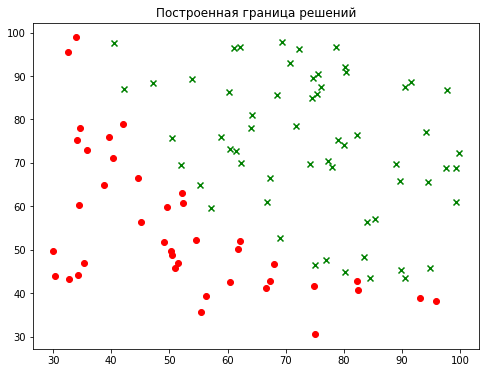

In [36]:
plt.figure(figsize=(8, 6))
plt.title('Построенная граница решений')
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], c='r', marker='o')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], c='g', marker='x');